In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data  = pd.read_csv('../datasets/heart.csv')

In [3]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

<Figure size 2500x1500 with 0 Axes>

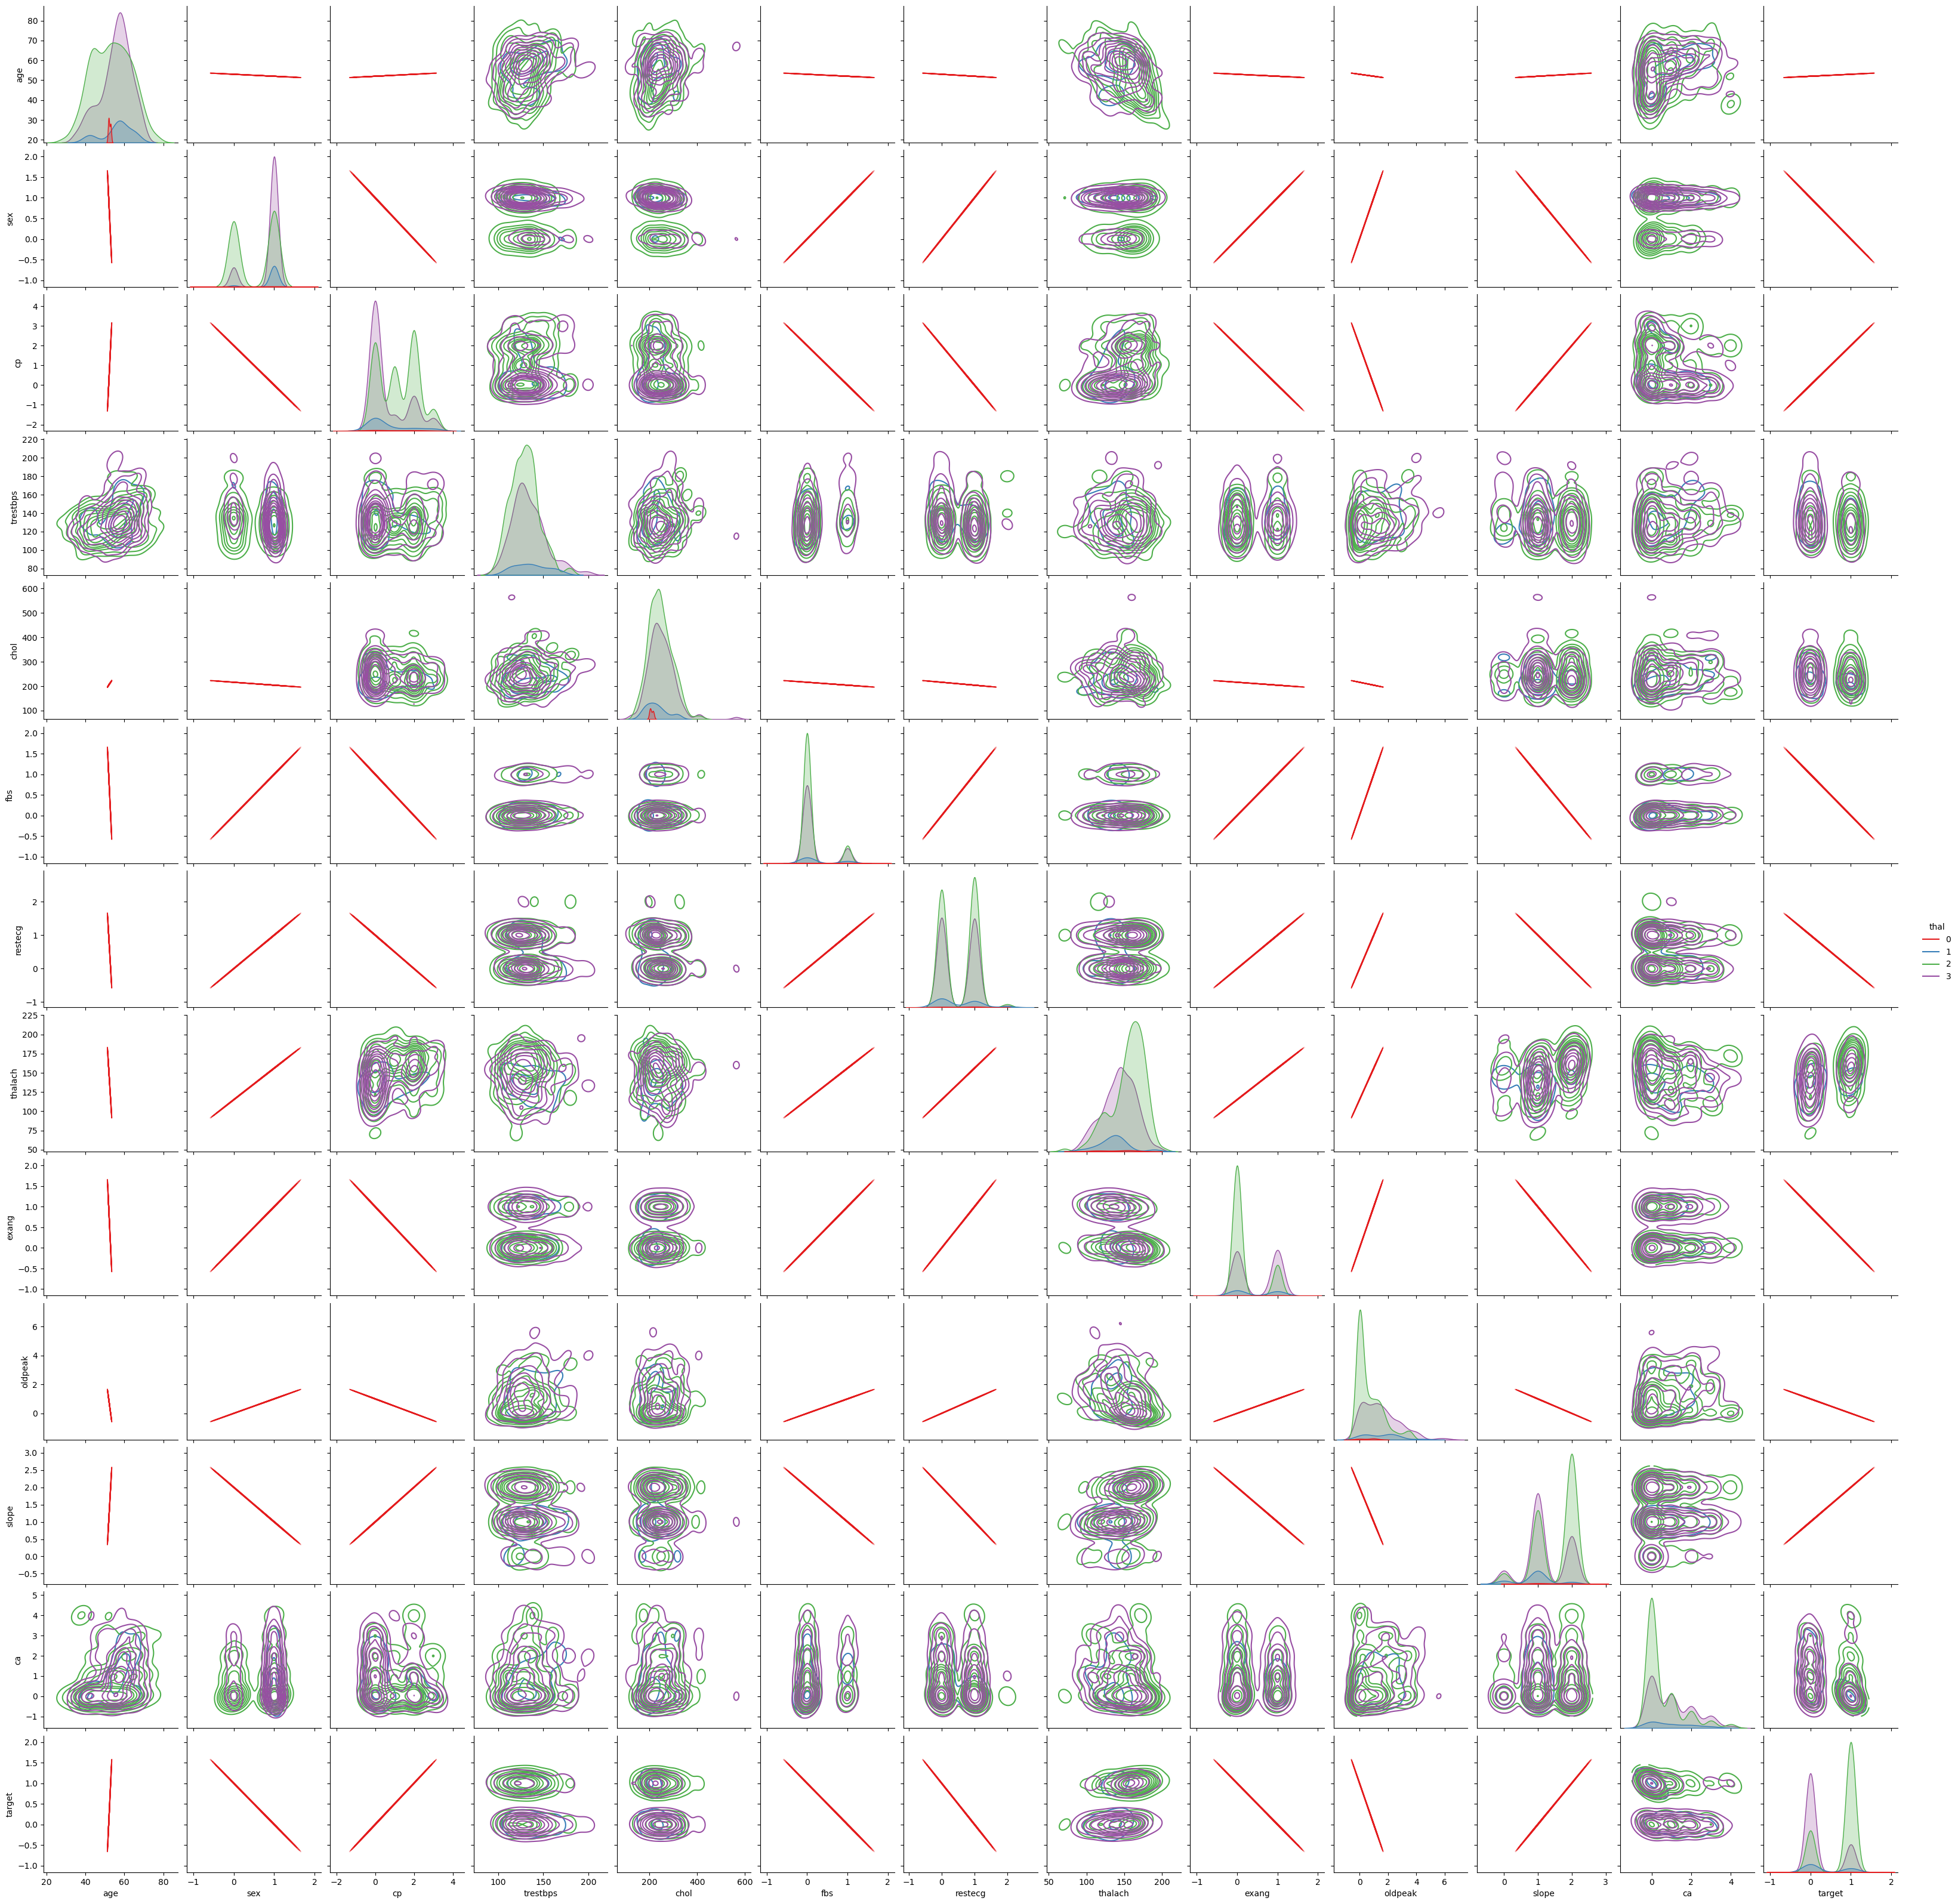

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
sns.pairplot(data, hue = "thal",palette = 'Set1',kind="kde")
plt.show()

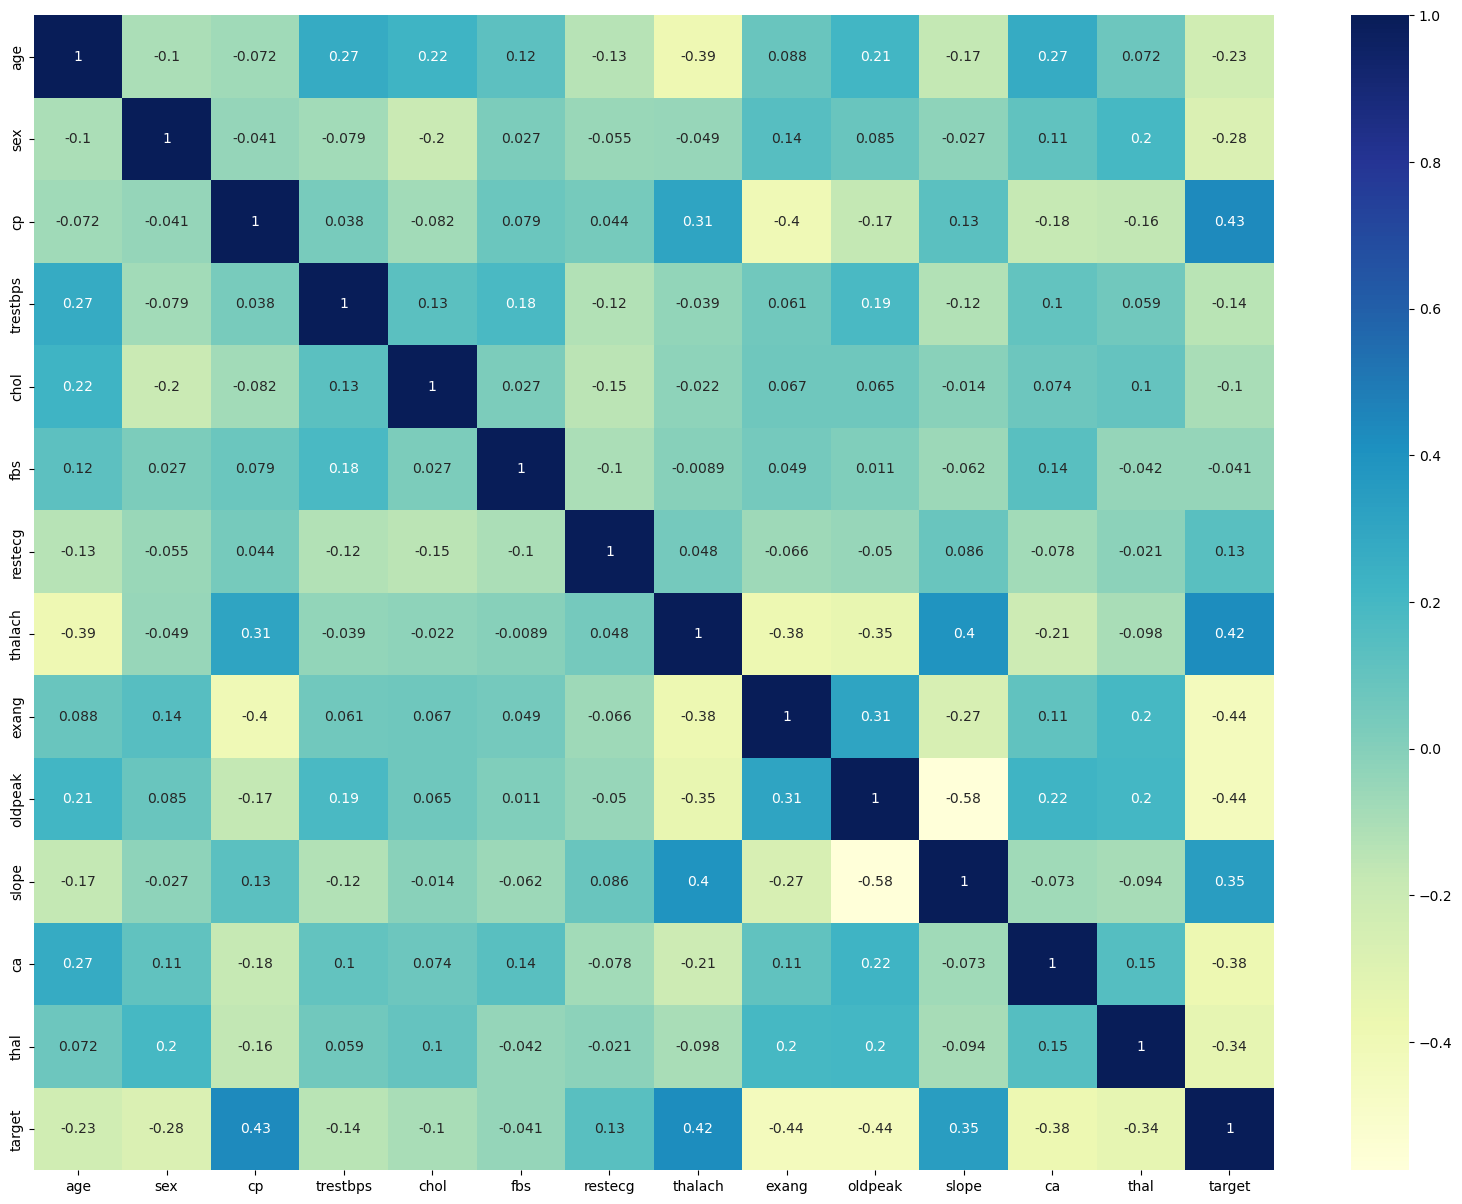

In [10]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(numeric_only = True),annot =True,cmap="YlGnBu")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data['trestbps'] = scale.fit_transform(data[['trestbps']])
data['chol'] = scale.fit_transform(data[['chol']])
data['thalach'] = scale.fit_transform(data[['thalach']])

In [16]:
X = data.drop('target',axis = 1)
Y = data['target']
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [19]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.5\nsamples = 820\nvalue = [402, 418]\nclass = y[1]'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.357\nsamples = 391\nvalue = [300, 91]\nclass = y[0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'thal <= 2.5\ngini = 0.499\nsamples = 165\nvalue = [86, 79]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.386\nsamples = 92\nvalue = [24, 68]\nclass = y[1]'),
 Text(0.1875, 0.125, 'gini = 0.256\nsamples = 73\nvalue = [62, 11]\nclass = y[0]'),
 Text(0.375, 0.375, 'oldpeak <= 0.45\ngini = 0.101\nsamples = 226\nvalue = [214, 12]\nclass = y[0]'),
 Text(0.3125, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.022\nsamples = 177\nvalue = [175, 2]\nclass = y[0]'),
 Text(0.75, 0.625, 'oldpeak <= 1.95\ngini = 0.362\nsamples = 429\nvalue = [102, 327]\nclass = y[1]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'age <= 56.5\ngini = 0.305\nsamples = 384\nvalue = [72, 312]\nclass = y[1]'),
 Text(0.5625, 0

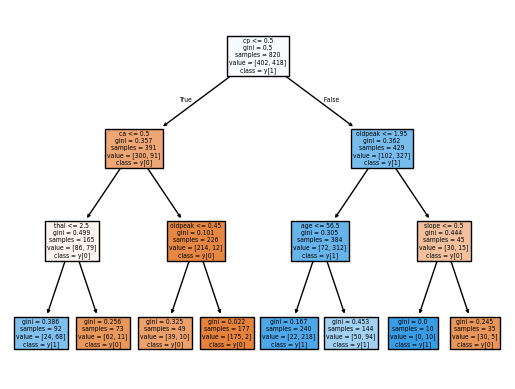

In [23]:
plot_tree(dt, filled=True, feature_names=X.columns,class_names = True)

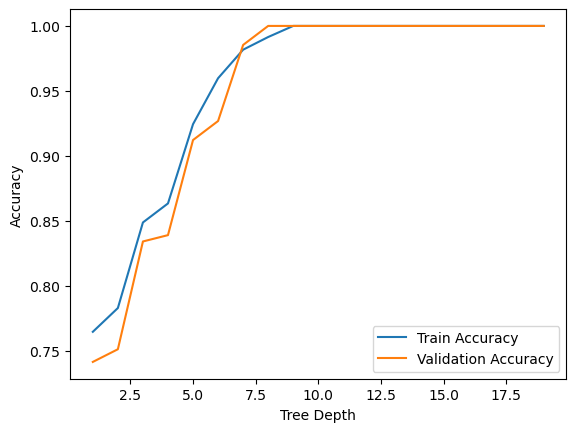

In [25]:
depths = range(1, 20)
train_scores = []
val_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, val_scores, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.8341463414634146
Random Forest Accuracy: 1.0


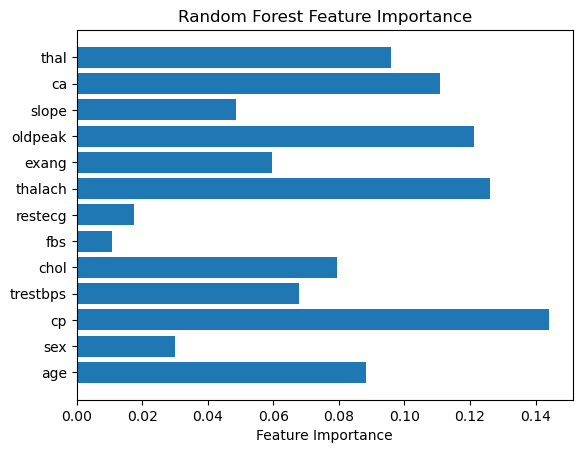

In [27]:
importances = rf.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [30]:
import numpy as np
cv_scores = cross_val_score(rf, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Score: 0.9970731707317073


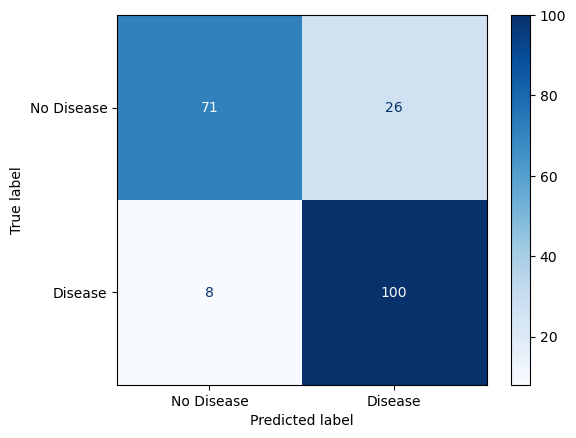

In [33]:
y_pred1 = dt.predict(x_test)
y_pred2 = rf.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')

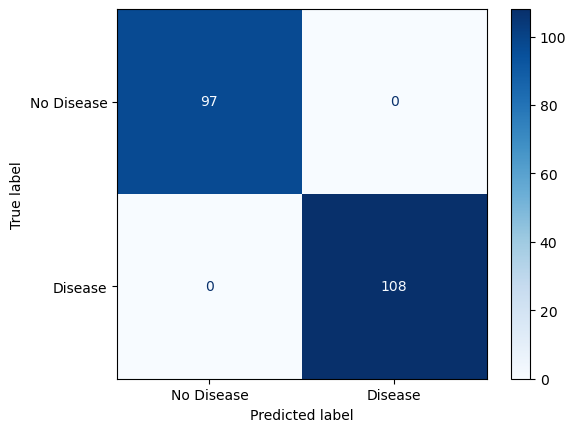

In [34]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')

In [38]:
report_dt = classification_report(y_test,y_pred1)
report_rf = classification_report(y_test,y_pred2)

In [39]:
print(report_dt)
print(report_rf)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        97
           1       0.79      0.93      0.85       108

    accuracy                           0.83       205
   macro avg       0.85      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       108

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

